# Importing Packages

In [1]:
# Programming
import pandas as pd
import numpy as np

# Machine Learning | sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nasa = pd.read_csv('nasa.csv',
                 parse_dates=['Close Approach Date', 'Orbit Determination Date', 'Epoch Date Close Approach'])

In [3]:
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


# **Preprocessing**

## Missing Value Analysis

In [4]:
print(nasa.isnull().sum())

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

## Correlation Matrix

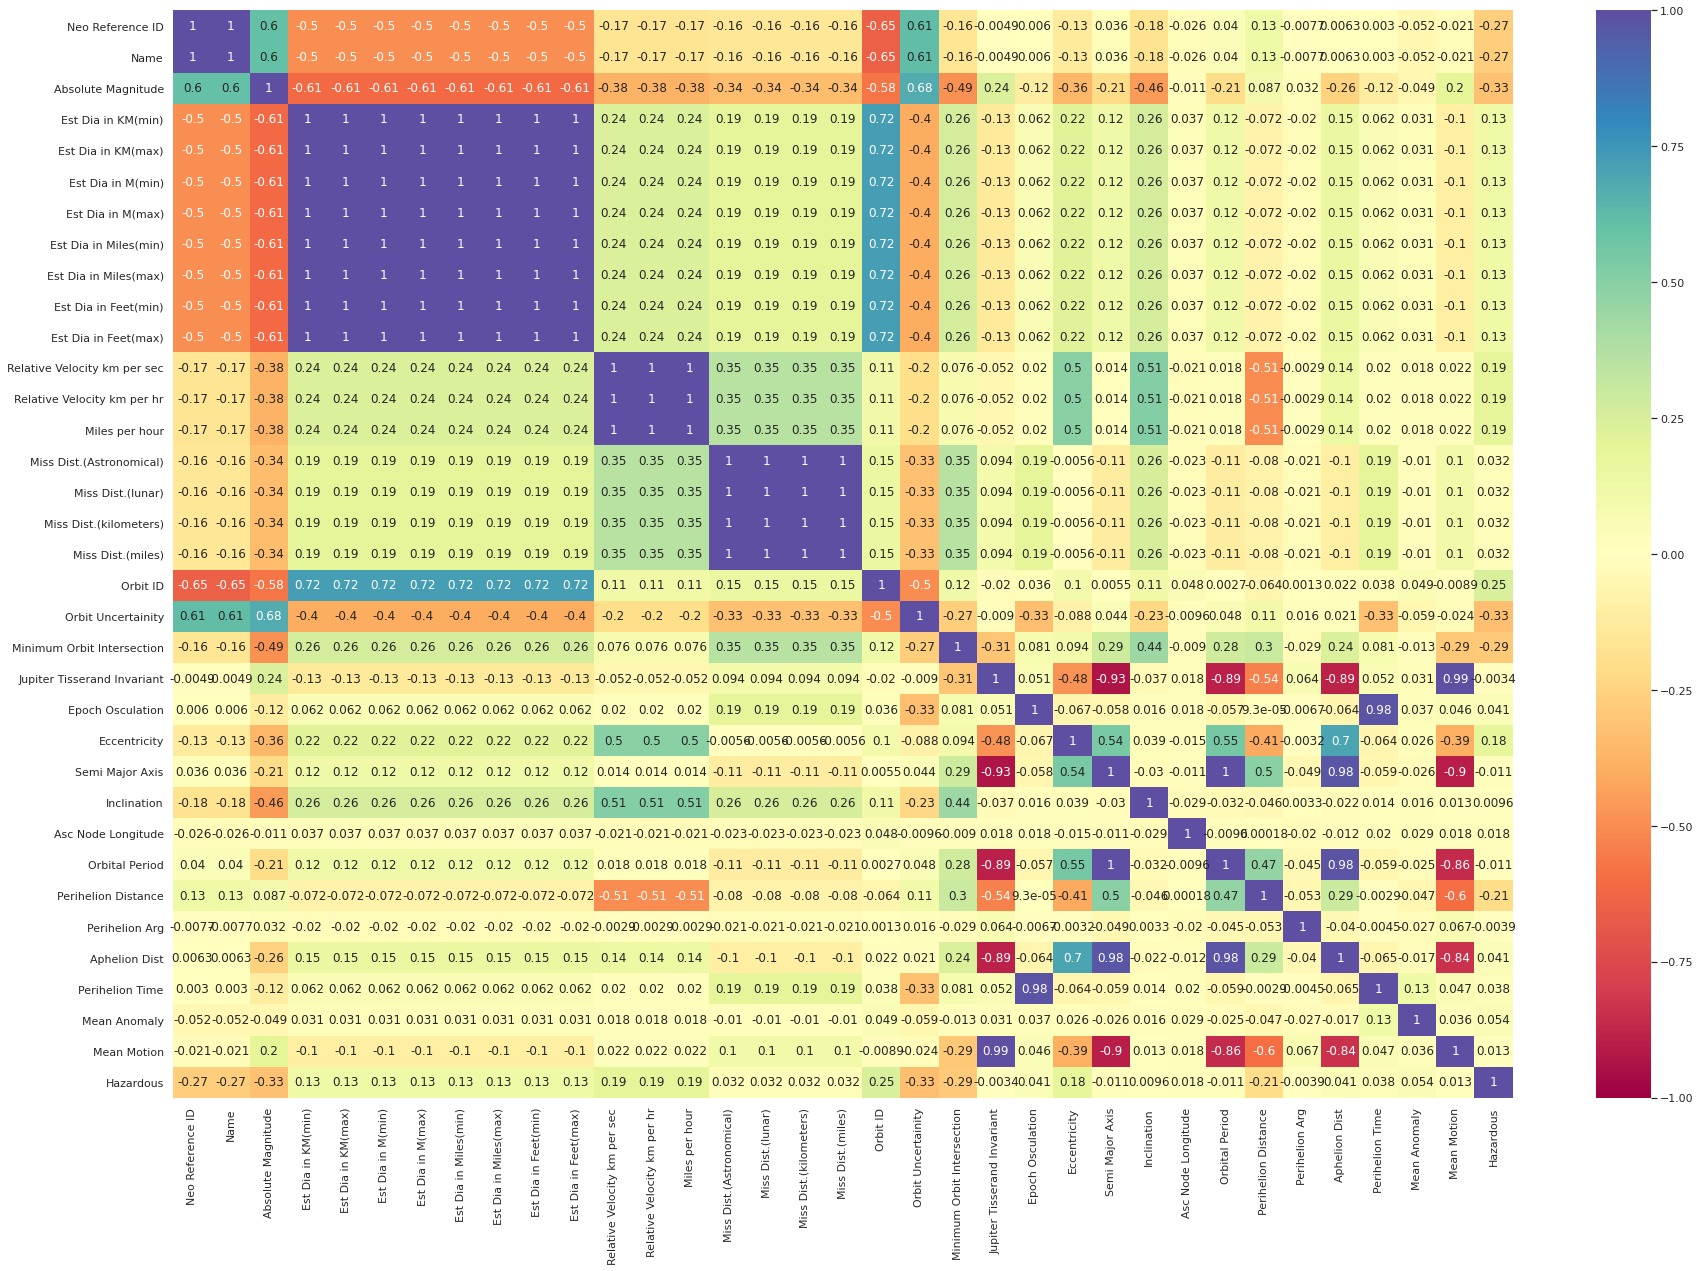

In [5]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(nasa.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

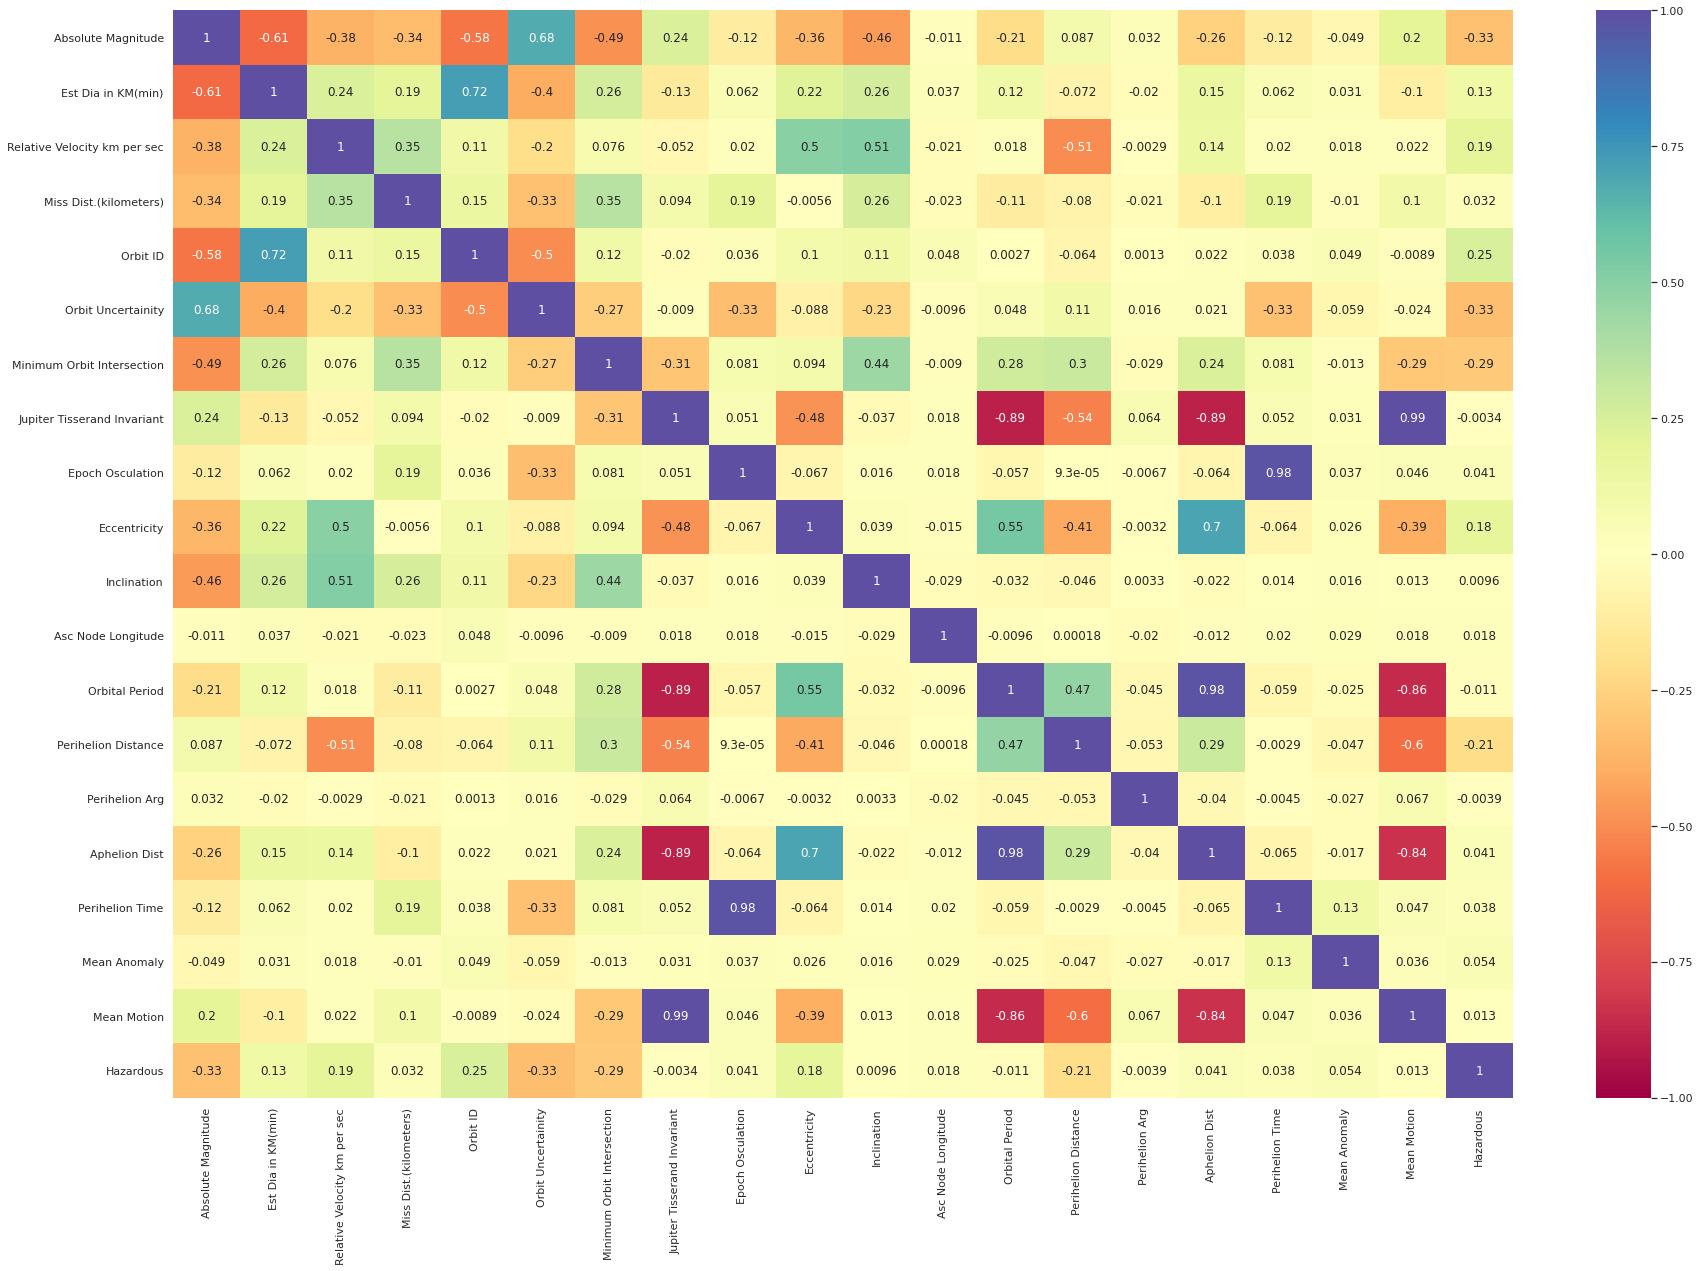

In [6]:
nasa = nasa.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)','Relative Velocity km per hr','Miles per hour','Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)','Semi Major Axis','Neo Reference ID', 'Name','Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)

# Plotting feature correlation with reduced dataset
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(nasa.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

In [7]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
nasa['hazardous'] = l_enc.fit_transform(nasa.Hazardous) 
print('Hazardous == True -> 1')
print('Hazardous == False -> 0\n')

# Checking if the other categorical features need to be encoded
print(nasa['Orbiting Body'].unique())
print(nasa['Equinox'].unique())
print('\n')
# Removing them since there is only a single value that is identical across all observations
nasa = nasa.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis=1)

# Check after all the changes
print(nasa.info())
nasa.head()

Hazardous == True -> 1
Hazardous == False -> 0

['Earth']
['J2000']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Relative Velocity km per sec  4687 non-null   float64
 3   Miss Dist.(kilometers)        4687 non-null   float64
 4   Orbit ID                      4687 non-null   int64  
 5   Orbit Uncertainity            4687 non-null   int64  
 6   Minimum Orbit Intersection    4687 non-null   float64
 7   Jupiter Tisserand Invariant   4687 non-null   float64
 8   Epoch Osculation              4687 non-null   float64
 9   Eccentricity                  4687 non-null   float64
 10  Inclination                   4687 non-null   float64
 11  Asc Node Longitude            4687 non-null   float

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,hazardous
0,21.6,0.127220,6.115834,62753692.0,17,5,0.025282,4.634,2458000.5,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,57298148.0,21,3,0.186935,5.457,2458000.5,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,7622911.5,22,0,0.043058,4.557,2458000.5,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,42683616.0,7,6,0.005512,5.093,2458000.5,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,61010824.0,25,1,0.034798,5.154,2458000.5,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [8]:
nasa

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,hazardous
0,21.600,0.127220,6.115834,6.275369e+07,17,5,0.025282,4.634,2458000.5,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,18.113985,5.729815e+07,21,3,0.186935,5.457,2458000.5,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,7.590711,7.622912e+06,22,0,0.043058,4.557,2458000.5,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,11.173874,4.268362e+07,7,6,0.005512,5.093,2458000.5,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,9.840831,6.101082e+07,25,1,0.034798,5.154,2458000.5,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,22.154265,6.187511e+06,4,8,0.019777,5.156,2457637.5,0.361512,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,3.225150,9.677324e+05,2,6,0.006451,5.742,2458000.5,0.073200,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,7.191642,9.126775e+06,17,6,0.059972,4.410,2458000.5,0.368055,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,11.352090,3.900908e+07,6,5,0.177510,4.477,2458000.5,0.202565,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [9]:

#save preprocessed data
#nasa.to_csv("preprocessed_data.csv", index=False)

## Discretization

In [16]:
nasa = pd.read_csv("preprocessed_data.csv")

## Selecting Features obtained from GA

In [17]:
out = nasa[['Relative Velocity km per sec', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Eccentricity', 'Orbital Period',
       'Mean Anomaly', 'hazardous']]

In [18]:
#out.to_csv("outputGA.csv",index=False )

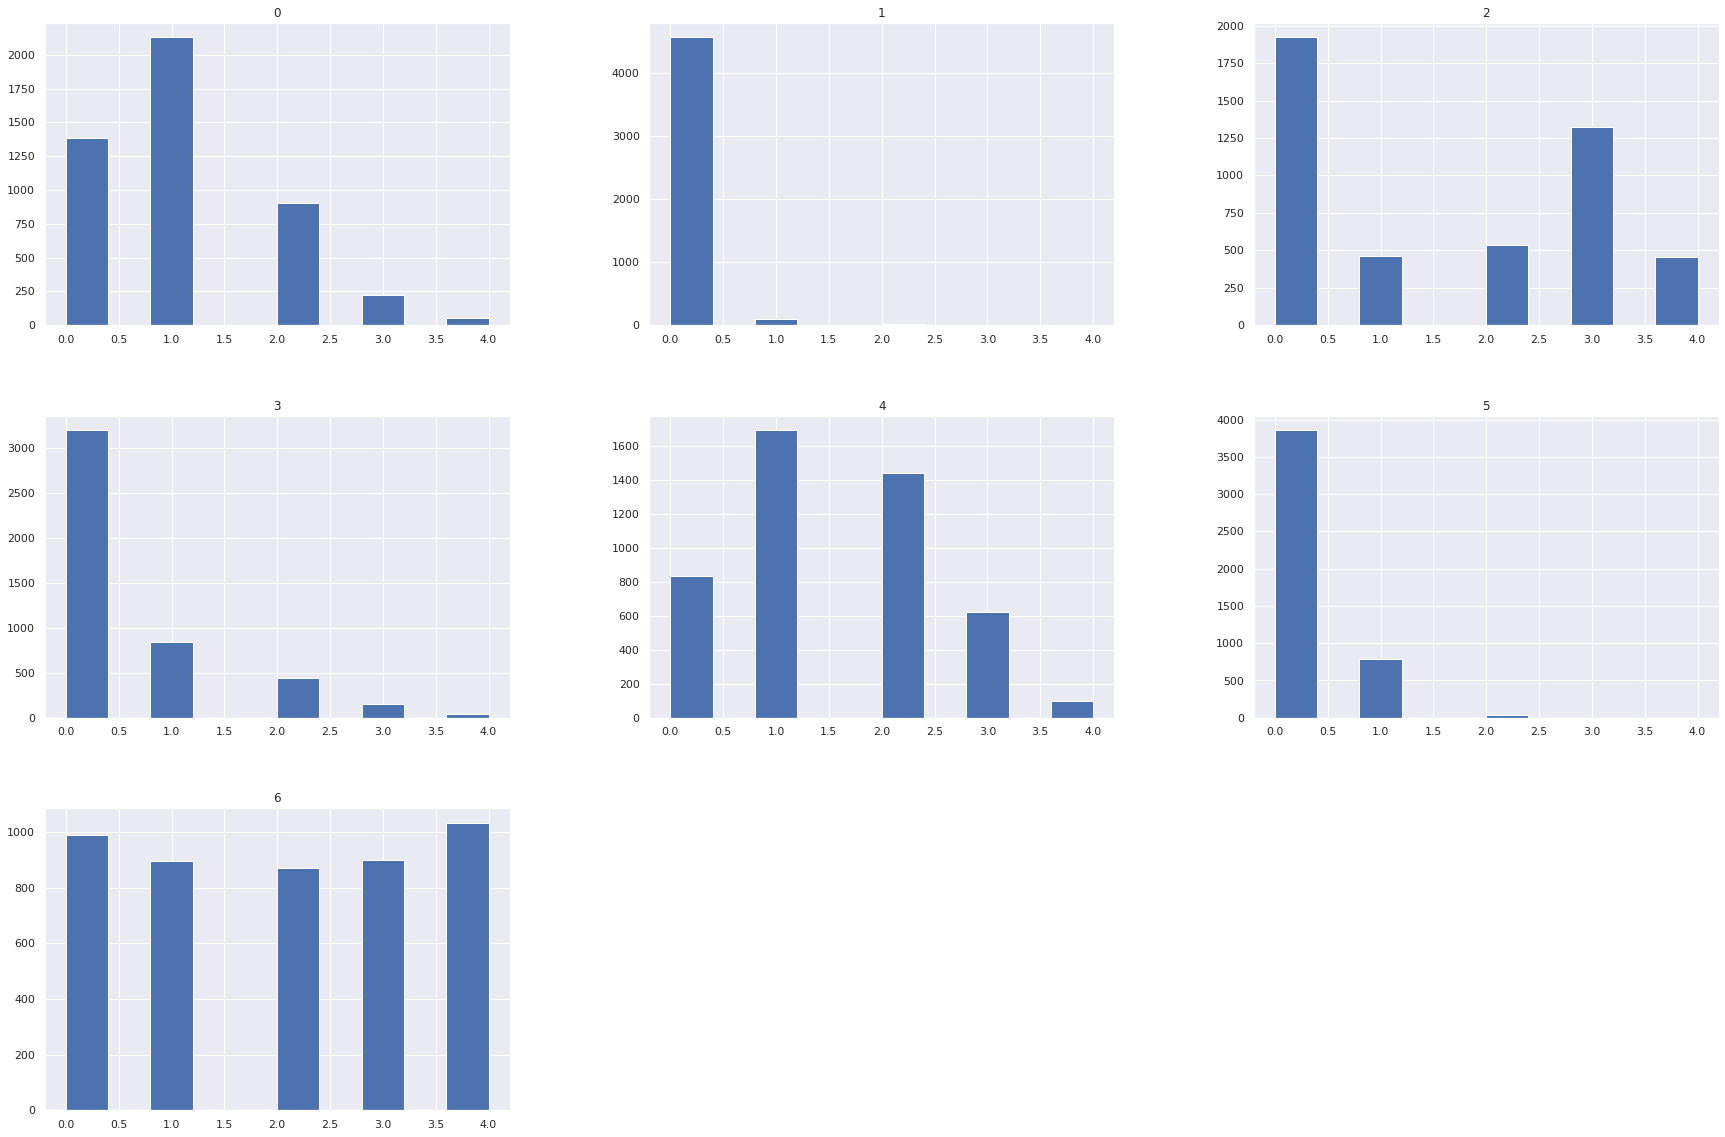

In [19]:
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
data = out.values[:, :-1]
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
disc_data = trans.fit_transform(data)
# convert the array back to a dataframe
disc_dataset = DataFrame(disc_data)
# histograms of the variables
disc_dataset.hist()
pyplot.show()


In [20]:
disc_dataset['hadarzours'] = nasa["hazardous"]

In [21]:
disc_dataset.columns = out.columns

In [22]:
# disc_dataset.to_csv("outputGADISC5.csv",index=False )

# Using R to Generate Rules

In [23]:
for i in range (disc_data.shape[1]):
    print(trans.bin_edges_[i])


[ 0.33550411  9.19515262 18.05480112 26.91444962 35.77409813 44.63374663]
[  1. 123. 245. 367. 489. 611.]
[0.  1.8 3.6 5.4 7.2 9. ]
[2.06000000e-06 9.55798480e-02 1.91157636e-01 2.86735424e-01
 3.82313212e-01 4.77891000e-01]
[0.00752235 0.19807003 0.3886177  0.57916538 0.76971305 0.96026072]
[ 176.5571614   975.69199772 1774.82683404 2573.96167036 3373.09650668
 4172.231343  ]
[3.19149100e-03 7.19861513e+01 1.43969111e+02 2.15952071e+02
 2.87935031e+02 3.59917991e+02]


In [24]:
arr = list(disc_dataset.columns)
arr.pop()


'hazardous'

In [25]:
arr

['Relative Velocity km per sec',
 'Orbit ID',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Eccentricity',
 'Orbital Period',
 'Mean Anomaly']

In [26]:

column_names = list(arr)

li = []
for i in (trans.bin_edges_):
    li.append(list(i))

df_bin_edges = pd.DataFrame(li)

#save bin_edges
df_bin_edges.to_csv("disc5bin_edges.csv", index=False)

In [27]:
df_bin_edges

,0,1,2,3,4,5
0,0.335504,9.195153,18.054801,26.914450,35.774098,44.633747
1,1.000000,123.000000,245.000000,367.000000,489.000000,611.000000
2,0.000000,1.800000,3.600000,5.400000,7.200000,9.000000
3,0.000002,0.095580,0.191158,0.286735,0.382313,0.477891
4,0.007522,0.198070,0.388618,0.579165,0.769713,0.960261
5,176.557161,975.691998,1774.826834,2573.961670,3373.096507,4172.231343
6,0.003191,71.986151,143.969111,215.952071,287.935031,359.917991
